### This notebook will be used to generate visualizations to accompany the report on this project and not for any of the deep learning or data processing.

In [1]:
# import dependencies

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in CSV data to a Pandas dataframe
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
#create a copy of the cleaned data frame

group = application_df.copy()

#find the number of mice of each sex using groupby and .nunique()

grouped = group.groupby("IS_SUCCESSFUL")

ratio = grouped.nunique("NAME")
ratio

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT
IS_SUCCESSFUL,,,,,,,,,,,
0,16038,6122,13,5,45,4,4,2,9,2,3917
1,18261,13706,17,6,63,5,4,2,9,2,4906


In [4]:
ratio.reset_index(inplace=True)

ratio.rename(columns={"NAME" : "Success Rate"}, inplace=True)

ratio


,IS_SUCCESSFUL,EIN,Success Rate,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT
0,0,16038,6122,13,5,45,4,4,2,9,2,3917
1,1,18261,13706,17,6,63,5,4,2,9,2,4906


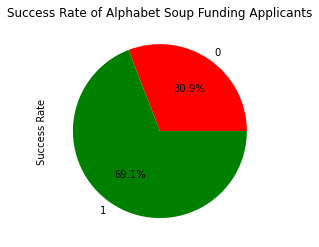

In [8]:
colors = ["red", "green"]
ratio["Success Rate"].plot(kind="pie", colors=colors, autopct='%1.1f%%')
plt.title("Success Rate of Alphabet Soup Funding Applicants")
plt.show()